In [21]:
import requests
import pandas as pd

In [22]:
response = requests.get("https://fishingclassification-hfis4rtnsq-ew.a.run.app/sample?sample_request=pole_and_line").json()

In [23]:
data = pd.DataFrame(response)

In [24]:
place_lat=data["lat"].tolist()
place_lng=data["lon"].tolist()

df_fishing = data[data['is_fishing']==1]
fishing = list(zip(df_fishing.lat, df_fishing.lon))

df_not_fishing = data[data['is_fishing']==0]
not_fishing = list(zip(df_not_fishing.lat, df_not_fishing.lon))

len(fishing), len(not_fishing), data.shape

(5790, 49397, (55187, 12))

In [25]:
data.columns

Index(['mmsi', 'distance_from_shore', 'distance_from_port', 'speed', 'course',
       'lat', 'lon', 'month', 'day_of_week', 'hour_sin', 'hour_cos',
       'is_fishing'],
      dtype='object')

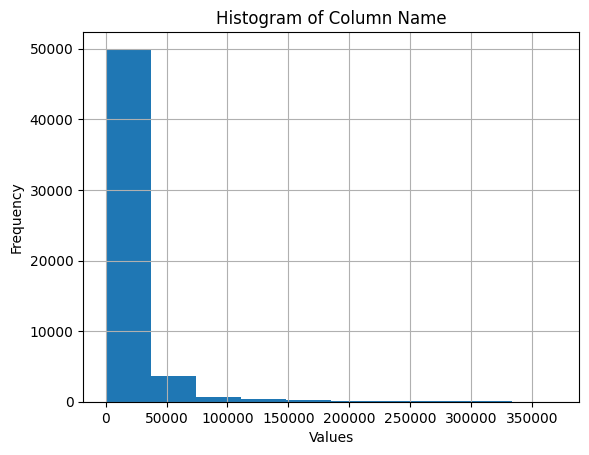

In [26]:
import matplotlib.pyplot as plt

# Plot a histogram of a single column in the DataFrame
data.hist(column='distance_from_shore')

# Set the title and axis labels
plt.title('Histogram of Column Name')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [27]:
df = pd.read_csv('../data/raw_data/pole_and_line.csv')

In [28]:
df.shape

(161315, 10)

In [29]:
df.columns

Index(['mmsi', 'timestamp', 'distance_from_shore', 'distance_from_port',
       'speed', 'course', 'lat', 'lon', 'is_fishing', 'source'],
      dtype='object')

In [30]:
df['timestamp']

0         1.340882e+09
1         1.340884e+09
2         1.340885e+09
3         1.340888e+09
4         1.340925e+09
              ...     
161310    1.478701e+09
161311    1.479122e+09
161312    1.479191e+09
161313    1.479202e+09
161314    1.479251e+09
Name: timestamp, Length: 161315, dtype: float64

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [34]:
df['date'] = df['timestamp'].dt.date
df.drop(columns='timestamp', axis=1, inplace=True)

In [35]:
df.columns

Index(['mmsi', 'distance_from_shore', 'distance_from_port', 'speed', 'course',
       'lat', 'lon', 'is_fishing', 'source', 'date'],
      dtype='object')

In [39]:
df['date']

0         2012-06-28
1         2012-06-28
2         2012-06-28
3         2012-06-28
4         2012-06-28
             ...    
161310    2016-11-09
161311    2016-11-14
161312    2016-11-15
161313    2016-11-15
161314    2016-11-15
Name: date, Length: 161315, dtype: object

In [41]:
df_no_dup = df['date'].drop_duplicates()

In [43]:
df.shape, df_no_dup.shape

((161315, 10), (1625,))